<a href="https://colab.research.google.com/github/Fatimazahra-baba/Projet_DL/blob/master/Emotion_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!pip install -q keras

***Importer les libraries***

In [4]:
import tensorflow as tf
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, Activation,BatchNormalization
from keras.utils import to_categorical
from tensorflow.keras import activations
from keras.preprocessing import image
from tensorflow.keras import datasets, layers, models
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical



Using TensorFlow backend.


***Telecharger notre dataset :***

In [0]:

train_path = '/content/drive/My Drive/train set'
validation_path = '/content/drive/My Drive/validation dataset'


***import the images from the dataset***

In [47]:
num_classes = 5
img_rows,img_cols = 48,48
batch_size = 64 

train_datagen = ImageDataGenerator(
					rescale=1./255,
					rotation_range=30,
					shear_range=0.3,
					zoom_range=0.3,
					width_shift_range=0.4,
					height_shift_range=0.4,
					horizontal_flip=True,
					fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
					train_path,
					color_mode='grayscale',
					target_size=(img_rows,img_cols),
					batch_size=batch_size,
					class_mode='categorical',
					shuffle=True)

validation_generator = validation_datagen.flow_from_directory(
							validation_path,
							color_mode='grayscale',
							target_size=(img_rows,img_cols),
							batch_size=batch_size,
							class_mode='categorical',
							shuffle=True)




Found 24261 images belonging to 5 classes.
Found 3006 images belonging to 5 classes.


In [69]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))


model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 46, 46, 32)        320       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 44, 44, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 22, 22, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 20, 20, 64)        18496     
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 18, 18, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 9, 9, 64)         

***Compile and train the model***

In [74]:
from keras.optimizers import RMSprop,SGD,Adam
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

nb_train_samples = 24176
nb_validation_samples = 3006


history=model.fit(train_generator,
                    epochs=30,
                    validation_data=validation_generator,
                    validation_steps=validation_generator.samples // batch_size)

Epoch 1/30
380/380 [==============================] - 224s 591ms/step - loss: 1.3048 - accuracy: 0.4538 - val_loss: 1.5588 - val_accuracy: 0.5078
Epoch 2/30
380/380 [==============================] - 225s 592ms/step - loss: 1.2938 - accuracy: 0.4538 - val_loss: 1.1603 - val_accuracy: 0.5071
Epoch 3/30
380/380 [==============================] - 219s 577ms/step - loss: 1.2962 - accuracy: 0.4566 - val_loss: 1.4365 - val_accuracy: 0.5068
Epoch 4/30
380/380 [==============================] - 227s 597ms/step - loss: 1.2821 - accuracy: 0.4622 - val_loss: 1.1224 - val_accuracy: 0.5197
Epoch 5/30
380/380 [==============================] - 226s 595ms/step - loss: 1.2903 - accuracy: 0.4558 - val_loss: 1.3079 - val_accuracy: 0.5275
Epoch 6/30
380/380 [==============================] - 220s 580ms/step - loss: 1.2827 - accuracy: 0.4643 - val_loss: 1.3913 - val_accuracy: 0.5245
Epoch 7/30
380/380 [==============================] - 227s 599ms/step - loss: 1.2846 - accuracy: 0.4640 - val_loss: 1.5219 -

***Evaluate the model***

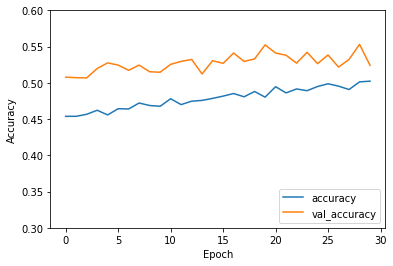

In [77]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.3,0.6])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(validation_generator,verbose=2)

la précision de notre modéle

In [78]:
print(test_acc)

0.5372588038444519
